In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import multiprocessing
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
os.getcwd()
os.chdir('C:\\Users\\Ben\\Documents\\682_project')

In [5]:
with open('data/self_play/allpick_with_clusters_vs_random_memory_500_rollouts.pickle', 'rb') as f:
    mem = pickle.load(f)

In [9]:
mem[10]

{'all_actions': [72,
  47,
  34,
  28,
  35,
  100,
  92,
  118,
  104,
  39,
  105,
  90,
  50,
  93,
  67,
  113,
  80,
  45,
  44,
  63,
  73,
  89,
  89],
 'all_states': [array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2.]),
  array([ 0., 72.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([ 0., 72.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         47.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([ 0., 72., 34.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         47.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([ 0., 72., 34.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         47., 28.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([ 0., 72., 34., 35.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
         47., 28.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,

In [220]:
with open('data/evaluations/eval1.pickle', 'rb') as f:
    mem = pickle.load(f)

In [221]:
mem[0]

{'all_actions': [34,
  108,
  24,
  103,
  11,
  63,
  74,
  31,
  43,
  61,
  76,
  84,
  38,
  45,
  44,
  95,
  23,
  65,
  117,
  59,
  105,
  80,
  80],
 'all_states': [array([0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 1.]),
  array([ 0., 34.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
          2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]),
  array([  0.,  34.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   1., 108.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   2.,   1.]),
  array([  0.,  34.,  24.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   1., 108.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   2.,   1.]),
  array([  0.,  34.,  24.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   1., 108., 103.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
           2.,   2.,   1.]),
  array([  0.,  34.,  24.,

In [4]:
def plot_random_win_rates():
    with open('data/self_play/random_vs_random_memory.pickle', 'rb') as f:
        mem = pickle.load(f)
    
    random_wins = []
    for m in mem:
        random_wins.append(m[2][0])
    random_wins = np.array(random_wins)
    random_wins = random_wins[random_wins != None]
    
    fig, ax = plt.subplots()
    sns.countplot(random_wins, ax=ax);
    ax.set(xticks=[0, 1], xticklabels=['Radiant Victory', 'Dire Victory']);
    plt.title('Baseline: Random Vs. Random');

In [5]:
def plot_captains_mode_win_rates():
    with open('data/self_play/captains_mode_vs_random_memory_2.pickle', 'rb') as f:
        mem = pickle.load(f)
    all_outcomes = []
    all_agent_pick_first = []
    all_ids = []
    for id,m in enumerate(mem):
        v = m['all_values']
        for i in range(23 - len(v)):
            v.append(v[0])
        all_outcomes.extend(v)
        p = m['all_agent_pick_first']
        for i in range(23 - len(p)):
            p.append(p[0])
        all_agent_pick_first.extend(p)
        all_ids.extend([id]*23)
    all_outcomes = np.array(all_outcomes)
    missing = all_outcomes >= 0
    all_outcomes = all_outcomes[missing]
    all_agent_pick_first = np.array(all_agent_pick_first)
    all_agent_pick_first = all_agent_pick_first[missing]
    all_ids = np.array(all_ids)
    all_ids = all_ids[missing]
    df = pd.DataFrame(dict(id=all_ids, outcome=all_outcomes, pick_first=all_agent_pick_first))
    df['agent_win'] = df['outcome'] == df['pick_first']
    sns.countplot(x='agent_win', data=df.groupby('id').head(1))
    plt.title('Pre-trained on Both Datasets Vs. Random')

In [6]:
def plot_allpick_win_rates():
    with open('data/self_play/all_pick_with_clusters_vs_random_memory_500_rollouts.pickle', 'rb') as f:
        mem = pickle.load(f)
    all_outcomes = []
    all_agent_pick_first = []
    all_ids = []
    for id, m in enumerate(mem):
        v = m['all_values']
        for i in range(23 - len(v)):
            v.append(v[0])
        all_outcomes.extend(v)
        p = m['all_agent_pick_first']
        for i in range(23 - len(p)):
            p.append(p[0])
        all_agent_pick_first.extend(p)
        all_ids.extend([id]*23)
    all_outcomes = np.array(all_outcomes)
    missing = all_outcomes != None
    all_outcomes = all_outcomes[missing]
    all_agent_pick_first = np.array(all_agent_pick_first)
    all_agent_pick_first = all_agent_pick_first[missing]
    all_ids = np.array(all_ids)
    all_ids = all_ids[missing]
    df = pd.DataFrame(dict(id=all_ids, outcome=all_outcomes, pick_first=all_agent_pick_first))
    df['agent_win'] = df['outcome'] == df['pick_first']
    print(df)
    sns.countplot(x='agent_win', data=df.groupby('id').head(1))
    plt.title('Pre-trained on All Pick Dataset Vs. Random')

In [7]:
def plot_compared_win_rates():
    with open('data/self_play/random_vs_random_memory.pickle', 'rb') as f:
        mem = pickle.load(f)
    
    random_wins = []
    for m in mem:
        random_wins.append(m[2][0])
    random_wins = np.array(random_wins)
    random_wins = random_wins[random_wins != None]
    random_winrate = np.mean(random_wins)
    
    with open('data/self_play/captains_mode_vs_random_memory_2.pickle', 'rb') as f:
        mem = pickle.load(f)
    all_outcomes = []
    all_agent_pick_first = []
    all_ids = []
    for id,m in enumerate(mem):
        v = m['all_values']
        for i in range(23 - len(v)):
            v.append(v[0])
        all_outcomes.extend(v)
        p = m['all_agent_pick_first']
        for i in range(23 - len(p)):
            p.append(p[0])
        all_agent_pick_first.extend(p)
        all_ids.extend([id]*23)
    all_outcomes = np.array(all_outcomes)
    missing = all_outcomes >= 0
    all_outcomes = all_outcomes[missing]
    all_agent_pick_first = np.array(all_agent_pick_first)
    all_agent_pick_first = all_agent_pick_first[missing]
    all_ids = np.array(all_ids)
    all_ids = all_ids[missing]
    df = pd.DataFrame(dict(id=all_ids, outcome=all_outcomes, pick_first=all_agent_pick_first))
    df['agent_win'] = df['outcome'] == df['pick_first']
    cm_winrate = df['agent_win'].mean()
    
    with open('data/self_play/allpick_vs_random_memory.pickle', 'rb') as f:
        mem = pickle.load(f)
    all_outcomes = []
    all_agent_pick_first = []
    all_ids = []
    for id, m in enumerate(mem):
        v = m['all_values']
        for i in range(23 - len(v)):
            v.append(v[0])
        all_outcomes.extend(v)
        p = m['all_agent_pick_first']
        for i in range(23 - len(p)):
            p.append(p[0])
        all_agent_pick_first.extend(p)
        all_ids.extend([id]*23)
    all_outcomes = np.array(all_outcomes)
    missing = all_outcomes != None
    all_outcomes = all_outcomes[missing]
    all_agent_pick_first = np.array(all_agent_pick_first)
    all_agent_pick_first = all_agent_pick_first[missing]
    all_ids = np.array(all_ids)
    all_ids = all_ids[missing]
    df = pd.DataFrame(dict(id=all_ids, outcome=all_outcomes, pick_first=all_agent_pick_first))
    df['agent_win'] = df['outcome'] == df['pick_first']
    ap_winrate = df['agent_win'].mean()
    
    fig, ax = plt.subplots()
    xs = range(3)
    ys = [random_winrate, ap_winrate, cm_winrate]
    print(ys)
    ax.scatter(xs, ys)
    ax.set(xticks=xs, xticklabels=['Random', 'All Pick', 'Captains Mode + All Pick']);
    plt.title('Win Rates vs Random Drafting Agent')
    plt.ylabel('Win Rate')
    plt.xlabel('Agent Type')
    plt.savefig('compare_win_rates.png')

[0.5116279069767442, 0.53, 0.5056179775280899]


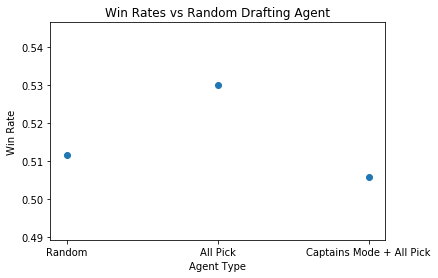

In [8]:
plot_compared_win_rates()

In [ ]:
plot_random_win_rates()

In [ ]:
plot_allpick_win_rates()

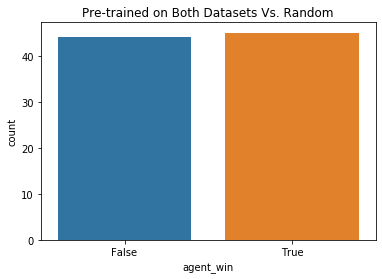

In [214]:
plot_captains_mode_win_rates()